## Accessing FRED

This notebook access public, freely available data from the Federal Reserve Board. All that is needed is an 
api key that can be obtained at no cost from the Federal Reserve. Installation is simple using:<br>`pip install fredapi`
Below are some examples.

In [3]:
import matplotlib.pyplot as plt
import pandas as pd

from fredapi import Fred  # from https://github.com/mortada/fredapi 
%matplotlib inline

In [48]:
def start_end_dates(all_dates, days_to_gap=45):
    """ 
    Calculate the start and end dates of an important period. 
    matplotlib's fill_between x parameter requires a beginning and end date.
    param: date_array: All of the dates of interest
    returns: a list of the start and end date ranges for periods of interest.
    """
    date_range = []
    try:
        first = all_dates[0]
    except IndexError:
        return None
    prev = all_dates[0]
    for day_date in all_dates[1:]:
        if day_date - prev > np.timedelta64(days_to_gap, 'D'):
            date_range.append([first, prev])
            first = day_date
        prev = day_date
    date_range.append([first, prev]) # the last segment
    return date_range

In [16]:
fred = Fred(api_key_file='api_key.txt')
FIGSIZE=(15, 7)

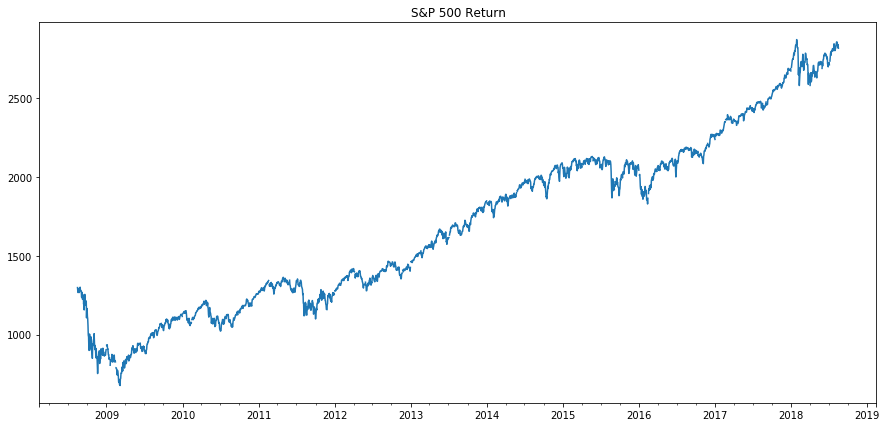

In [20]:
eq_data = fred.get_series('SP500')
eq_data.plot(figsize=FIGSIZE, title='S&P 500 Return')

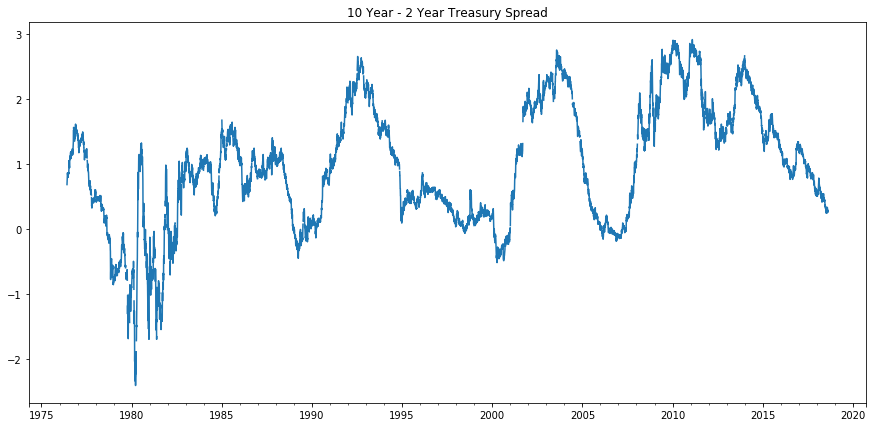

In [21]:
tr_data = fred.get_series('T10Y2Y')
tr_data.plot(figsize=FIGSIZE, title='10 Year - 2 Year Treasury Spread')

1854-12-01    1.0
1855-01-01    0.0
1855-02-01    0.0
1855-03-01    0.0
1855-04-01    0.0
dtype: float64

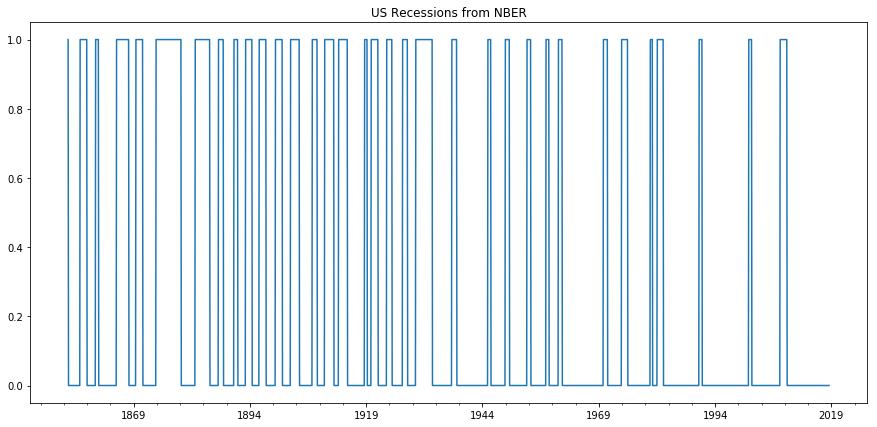

In [25]:
rec = fred.get_series('USREC')
rec.plot(figsize=FIGSIZE, title='US Recessions from NBER')

Create a common dataframe so the histories line up and also eliminate the NA rows.

In [62]:
econ_data = pd.concat([tr_data, rec], axis=1)
econ_data = econ_data.dropna()
econ_data.columns=['TR10y2y', 'USREC']
# econ_data = econ_data['1979-12-31':]
econ_data.head()

,TR10y2y,USREC
1976-06-01,0.68,0.0
1976-07-01,0.86,0.0
1976-09-01,1.14,0.0
1976-10-01,1.25,0.0
1976-11-01,1.35,0.0


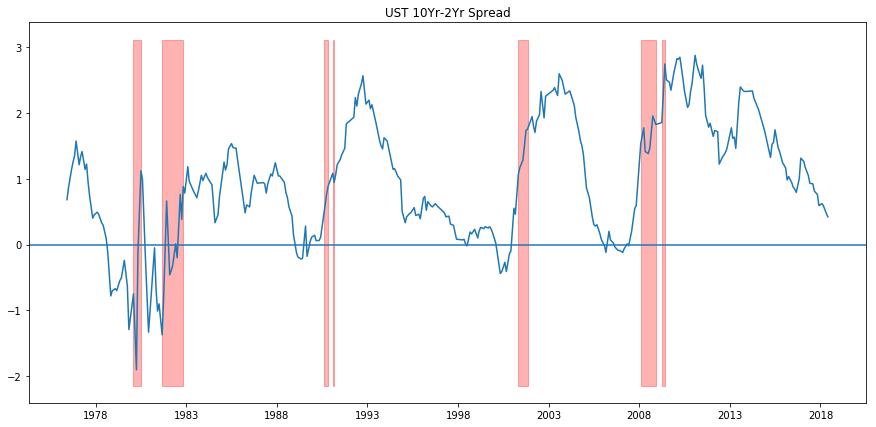

In [65]:
plt.figure(figsize=FIGSIZE)
plt.plot(econ_data['TR10y2y'])
plt.title('UST 10Yr-2Yr Spread')
plt.axhline(y=0)
y_min, y_max = plt.ylim()
rec_dates = start_end_dates(econ_data.loc[econ_data['USREC'] > 0].index.values, days_to_gap=65)
if rec_dates != None:
    for rec_rng in rec_dates:
        plt.fill_between(rec_rng, y1=y_min, y2=y_max, color='r', alpha=0.3)

In [59]:
help(pd.concat)

Help on function concat in module pandas.core.reshape.concat:

concat(objs, axis=0, join='outer', join_axes=None, ignore_index=False, keys=None, levels=None, names=None, verify_integrity=False, sort=None, copy=True)
    Concatenate pandas objects along a particular axis with optional set logic
    along the other axes.
    
    Can also add a layer of hierarchical indexing on the concatenation axis,
    which may be useful if the labels are the same (or overlapping) on
    the passed axis number.
    
    Parameters
    ----------
    objs : a sequence or mapping of Series, DataFrame, or Panel objects
        If a dict is passed, the sorted keys will be used as the `keys`
        argument, unless it is passed, in which case the values will be
        selected (see below). Any None objects will be dropped silently unless
        they are all None in which case a ValueError will be raised
    axis : {0/'index', 1/'columns'}, default 0
        The axis to concatenate along
    join : {'in